In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("covid_genome_edited.tsv", sep='\t')
df

,Strain,GISAID Clade,Age,Clade,Country,Country of Exposure,Admin Division,Division of Exposure,genbank_accession,gisaid_epi_isl,...,Location,Originating Lab,PANGO Lineage,Submission Date,Region,Sex,Emerging Clade,Submitting Lab,Collection Data,Author
0,Wuhan/WH01/2019,L,44.0,19A,China,China,Hubei,Hubei,LR757998.1,EPI_ISL_406798,...,Wuhan,General Hospital of Central Theater Command of...,B,Older,Asia,Male,19A,"BGI & Institute of Microbiology, Chinese Acade...",2019-12-26,Weijun Chen et al (https://dx.doi.org/10.1016/...
1,Australia/NSW02/2020,L,53.0,19A,Australia,China,New South Wales,China,NaN,EPI_ISL_408976,...,Sydney,Centre for Infectious Diseases and Microbiolog...,B,Older,Oceania,Male,19A,NSW Health Pathology - Institute of Clinical P...,2020-01-22,Rockett R et al (https://www.nature.com/articl...
2,India/MH-1-27/2020,L,20.0,19A,India,China,Maharashtra,Hubei,NaN,EPI_ISL_413522,...,NaN,Indian Council of Medical Research - National ...,B,Older,Asia,Female,19A,"National Influenza Center, Indian Council of M...",2020-01-27,Potdar V et al A (https://dx.doi.org/10.4103/i...
3,Australia/VIC14/2020,L,66.0,19A,Australia,Australia,Victoria,Victoria,NaN,EPI_ISL_419734,...,NaN,Victorian Infectious Diseases Reference Labora...,B,Older,Oceania,Male,19A,Victorian Infectious Diseases Reference Labora...,2020-02-02,Caly L. et al A (https://dx.doi.org/10.1101/20...
4,Japan/KY-V-029/2020,L,25.0,19A,Japan,Japan,Kyoto,Kyoto,NaN,EPI_ISL_408669,...,Kyoto,"Dept. of Virology III, National Institute of I...",B,Older,Asia,Female,19A,"Pathogen Genomics Center, National Institute o...",2020-01-29,Tsuyoshi Sekizuka et al A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,Australia/QLD996/2020,GR,NaN,20F,Australia,Australia,Queensland,Queensland,NaN,EPI_ISL_530255,...,NaN,Queensland Health Forensic and Scientific Serv...,D.2,Older,Oceania,NaN,20F,"Public Health Virology Laboratory, Forensic an...",2020-08-21,Son Nguyen et al et al
2991,Australia/QLD1140/2020,GR,NaN,20F,Australia,Australia,Australia,Australia,NaN,EPI_ISL_593641,...,NaN,NaN,D.2,Older,Oceania,NaN,20F,"Public Health Virology Laboratory, Forensic an...",2020-08-28,Son Nguyen et al. et al
2992,Australia/QLD1141/2020,GR,NaN,20F,Australia,Australia,Australia,Australia,NaN,EPI_ISL_593642,...,NaN,NaN,D.2,Older,Oceania,NaN,20F,"Public Health Virology Laboratory, Forensic an...",2020-08-28,Son Nguyen et al. et al
2993,Australia/QLD1134/2020,GR,NaN,20F,Australia,Australia,Australia,Australia,NaN,EPI_ISL_593639,...,NaN,NaN,D.2,Older,Oceania,NaN,20F,"Public Health Virology Laboratory, Forensic an...",2020-09-06,Son Nguyen et al. et al


# Different Countries

Making a subset of cases that have a different country of exposure versus country where case was recorded. 

In [3]:
df['Country'].value_counts()

Australia        277
USA              195
Brazil           132
New Zealand      110
Argentina         77
                ... 
Gabon              1
Liechtenstein      1
Mongolia           1
Bulgaria           1
Estonia            1
Name: Country, Length: 134, dtype: int64

In [4]:
df['Country of Exposure'].value_counts()

Australia      273
USA            199
Brazil         132
New Zealand    107
Argentina       73
              ... 
Iraq             1
Moldova          1
Guam             1
Botswana         1
Mongolia         1
Name: Country of Exposure, Length: 135, dtype: int64

In [5]:
crosscountry = []
for i in df["Country"]: 
    if i not in df["Country of Exposure"]:
        crosscountry.append(i)
    else:
        pass
print(crosscountry)

['China', 'Australia', 'India', 'Australia', 'Japan', 'United Arab Emirates', 'Australia', 'Australia', 'Australia', 'Australia', 'Japan', 'Japan', 'Hong Kong', 'Portugal', 'Italy', 'South Korea', 'South Korea', 'New Zealand', 'New Zealand', 'New Zealand', 'Brazil', 'USA', 'Aruba', 'Greece', 'Taiwan', 'Australia', 'New Zealand', 'New Zealand', 'Vietnam', 'Israel', 'Timor-Leste', 'New Zealand', 'Australia', 'Cambodia', 'Belgium', 'Uruguay', 'Slovenia', 'Pakistan', 'Sri Lanka', 'Bahrain', 'Bahrain', 'Sweden', 'USA', 'Sweden', 'Sweden', 'Iran', 'Iran', 'Iran', 'Iran', 'Hong Kong', 'New Zealand', 'Israel', 'Australia', 'Georgia', 'Iran', 'Australia', 'Oman', 'Sri Lanka', 'Australia', 'Kazakhstan', 'Kazakhstan', 'Kenya', 'Uganda', 'Bahrain', 'Iran', 'Australia', 'Iran', 'India', 'Cambodia', 'South Korea', 'South Korea', 'South Korea', 'South Korea', 'USA', 'China', 'Australia', 'United Arab Emirates', 'United Arab Emirates', 'Vietnam', 'Vietnam', 'USA', 'Australia', 'USA', 'Panama', 'USA', 

In [6]:
country_compare= np.where(df["Country"] == df["Country of Exposure"], True, False)

In [7]:
df["Same Country"] = country_compare

In [8]:
df

,Strain,GISAID Clade,Age,Clade,Country,Country of Exposure,Admin Division,Division of Exposure,genbank_accession,gisaid_epi_isl,...,Originating Lab,PANGO Lineage,Submission Date,Region,Sex,Emerging Clade,Submitting Lab,Collection Data,Author,Same Country
0,Wuhan/WH01/2019,L,44.0,19A,China,China,Hubei,Hubei,LR757998.1,EPI_ISL_406798,...,General Hospital of Central Theater Command of...,B,Older,Asia,Male,19A,"BGI & Institute of Microbiology, Chinese Acade...",2019-12-26,Weijun Chen et al (https://dx.doi.org/10.1016/...,True
1,Australia/NSW02/2020,L,53.0,19A,Australia,China,New South Wales,China,NaN,EPI_ISL_408976,...,Centre for Infectious Diseases and Microbiolog...,B,Older,Oceania,Male,19A,NSW Health Pathology - Institute of Clinical P...,2020-01-22,Rockett R et al (https://www.nature.com/articl...,False
2,India/MH-1-27/2020,L,20.0,19A,India,China,Maharashtra,Hubei,NaN,EPI_ISL_413522,...,Indian Council of Medical Research - National ...,B,Older,Asia,Female,19A,"National Influenza Center, Indian Council of M...",2020-01-27,Potdar V et al A (https://dx.doi.org/10.4103/i...,False
3,Australia/VIC14/2020,L,66.0,19A,Australia,Australia,Victoria,Victoria,NaN,EPI_ISL_419734,...,Victorian Infectious Diseases Reference Labora...,B,Older,Oceania,Male,19A,Victorian Infectious Diseases Reference Labora...,2020-02-02,Caly L. et al A (https://dx.doi.org/10.1101/20...,True
4,Japan/KY-V-029/2020,L,25.0,19A,Japan,Japan,Kyoto,Kyoto,NaN,EPI_ISL_408669,...,"Dept. of Virology III, National Institute of I...",B,Older,Asia,Female,19A,"Pathogen Genomics Center, National Institute o...",2020-01-29,Tsuyoshi Sekizuka et al A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,Australia/QLD996/2020,GR,NaN,20F,Australia,Australia,Queensland,Queensland,NaN,EPI_ISL_530255,...,Queensland Health Forensic and Scientific Serv...,D.2,Older,Oceania,NaN,20F,"Public Health Virology Laboratory, Forensic an...",2020-08-21,Son Nguyen et al et al,True
2991,Australia/QLD1140/2020,GR,NaN,20F,Australia,Australia,Australia,Australia,NaN,EPI_ISL_593641,...,NaN,D.2,Older,Oceania,NaN,20F,"Public Health Virology Laboratory, Forensic an...",2020-08-28,Son Nguyen et al. et al,True
2992,Australia/QLD1141/2020,GR,NaN,20F,Australia,Australia,Australia,Australia,NaN,EPI_ISL_593642,...,NaN,D.2,Older,Oceania,NaN,20F,"Public Health Virology Laboratory, Forensic an...",2020-08-28,Son Nguyen et al. et al,True
2993,Australia/QLD1134/2020,GR,NaN,20F,Australia,Australia,Australia,Australia,NaN,EPI_ISL_593639,...,NaN,D.2,Older,Oceania,NaN,20F,"Public Health Virology Laboratory, Forensic an...",2020-09-06,Son Nguyen et al. et al,True


In [9]:
diffcountry_df = df[df["Same Country"] == False]

In [10]:
diffcountry_df

,Strain,GISAID Clade,Age,Clade,Country,Country of Exposure,Admin Division,Division of Exposure,genbank_accession,gisaid_epi_isl,...,Originating Lab,PANGO Lineage,Submission Date,Region,Sex,Emerging Clade,Submitting Lab,Collection Data,Author,Same Country
1,Australia/NSW02/2020,L,53.0,19A,Australia,China,New South Wales,China,NaN,EPI_ISL_408976,...,Centre for Infectious Diseases and Microbiolog...,B,Older,Oceania,Male,19A,NSW Health Pathology - Institute of Clinical P...,2020-01-22,Rockett R et al (https://www.nature.com/articl...,False
2,India/MH-1-27/2020,L,20.0,19A,India,China,Maharashtra,Hubei,NaN,EPI_ISL_413522,...,Indian Council of Medical Research - National ...,B,Older,Asia,Female,19A,"National Influenza Center, Indian Council of M...",2020-01-27,Potdar V et al A (https://dx.doi.org/10.4103/i...,False
37,Pakistan/Gilgit1/2020,O,40.0,19A,Pakistan,Iran,Gilgit Baltistan,Iran,MT240479.1,EPI_ISL_417444,...,"Department of Healthcare Biotechnology, Nation...",B,Older,Asia,Female,19A,"Department of Healthcare Biotechnology, Nation...",2020-03-04,Javed et al (http://biorxiv.org/lookup/doi/10....,False
50,NewZealand/20VR0174/2020,O,NaN,19A,New Zealand,Iran,Auckland,Iran,NaN,EPI_ISL_413490,...,Auckland Hospital,B.4,Older,Oceania,Female,19A,Institute of Environmental Science and Researc...,2020-02-27,Matt Storey et al B (https://dx.doi.org/10.110...,False
65,Australia/NSW06/2020,O,51.0,19A,Australia,Iran,New South Wales,Iran,NaN,EPI_ISL_413213,...,Centre for Infectious Diseases and Microbiolog...,B.4,Older,Oceania,Female,19A,NSW Health Pathology - Institute of Clinical P...,2020-02-29,Eden J-S et al (https://www.nature.com/article...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,Kuwait/KU008/2020,GR,51.0,20B,Kuwait,United Kingdom,Kuwait,United Kingdom,NaN,EPI_ISL_422427,...,JABER AL AHMAD AL SABAH HOSPITAL – KUWAIT CITY,B.1.1.74,Older,Asia,Male,20B,Dasman Diabetes Institute,2020-03-16,Fahd Al-Mulla et al,False
2571,Malaysia/UNIMAS-15784/2020,GR,19.0,20B,Malaysia,Jordan,Sarawak,Jordan,NaN,EPI_ISL_718220,...,Ministry of Health Hospitals,B.1.1.74,Older,Asia,Male,20B,Institute of Health and Community Medicine,2020-11-12,David Perera et al,False
2781,Taiwan/NTU34/2020,GR,NaN,20B,Taiwan,United Kingdom,Taiwan,United Kingdom,NaN,EPI_ISL_693305,...,"Department of Laboratory Medicine, National Ta...",B.1.1.315,Older,Asia,Female,20B,"Microbial Genomics Core Lab, National Taiwan U...",2020-11-20,Shiou-Hwei Yeh et al,False
2808,India/CT-VRDL-AIIMS-UK-14180/2020,GR,28.0,20B,India,United Kingdom,Chhattisgarh,United Kingdom,NaN,EPI_ISL_944754,...,State Virus Research and Diagnostic Laboratory...,B.1.1.220,One week ago,Asia,Female,20B,State Virus Research and Diagnostic Laboratory...,2020-12-26,Pushpendra Singh et al,False


In [11]:
len(diffcountry_df)


68

In [12]:
diffcountry_df[['Strain', "Country", "Country of Exposure", "Admin Division", "Division of Exposure"]]

,Strain,Country,Country of Exposure,Admin Division,Division of Exposure
1,Australia/NSW02/2020,Australia,China,New South Wales,China
2,India/MH-1-27/2020,India,China,Maharashtra,Hubei
37,Pakistan/Gilgit1/2020,Pakistan,Iran,Gilgit Baltistan,Iran
50,NewZealand/20VR0174/2020,New Zealand,Iran,Auckland,Iran
65,Australia/NSW06/2020,Australia,Iran,New South Wales,Iran
...,...,...,...,...,...
2550,Kuwait/KU008/2020,Kuwait,United Kingdom,Kuwait,United Kingdom
2571,Malaysia/UNIMAS-15784/2020,Malaysia,Jordan,Sarawak,Jordan
2781,Taiwan/NTU34/2020,Taiwan,United Kingdom,Taiwan,United Kingdom
2808,India/CT-VRDL-AIIMS-UK-14180/2020,India,United Kingdom,Chhattisgarh,United Kingdom


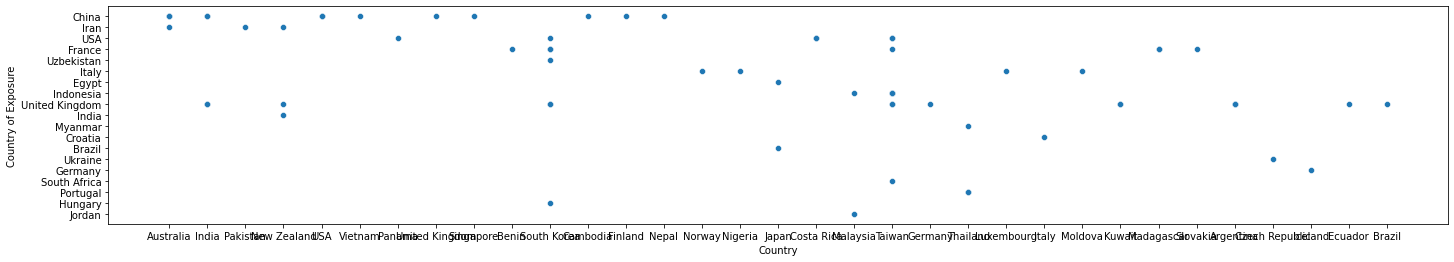

In [13]:
plt.figure(figsize=(24,4))
countryscat = sns.scatterplot(x = 'Country', y ='Country of Exposure', data=diffcountry_df)

 # GenBack Accession Numbers

Downloaded a text file of genbank accession numbers for COVID from NCBI. Then I compared those with the ones in my dataset. 

In [14]:
acc_df = pd.read_fwf("acc.txt")
acc_df

,id
0,MT612118
1,MT612127
2,MT671823
3,MT811171
4,MW494069
...,...
9995,MW277179
9996,MW277180
9997,MW277182
9998,MW277184


In [15]:
acc = acc_df['id']
acc

0       MT612118
1       MT612127
2       MT671823
3       MT811171
4       MW494069
          ...   
9995    MW277179
9996    MW277180
9997    MW277182
9998    MW277184
9999    MW277185
Name: id, Length: 10000, dtype: object

In [16]:
gen_df = df.dropna(subset=['genbank_accession'])
gen_df

,Strain,GISAID Clade,Age,Clade,Country,Country of Exposure,Admin Division,Division of Exposure,genbank_accession,gisaid_epi_isl,...,Originating Lab,PANGO Lineage,Submission Date,Region,Sex,Emerging Clade,Submitting Lab,Collection Data,Author,Same Country
0,Wuhan/WH01/2019,L,44.0,19A,China,China,Hubei,Hubei,LR757998.1,EPI_ISL_406798,...,General Hospital of Central Theater Command of...,B,Older,Asia,Male,19A,"BGI & Institute of Microbiology, Chinese Acade...",2019-12-26,Weijun Chen et al (https://dx.doi.org/10.1016/...,True
10,Japan/DP0703/2020,O,NaN,19A,Japan,Japan,Japan,Japan,LC571022.1,EPI_ISL_416619,...,Japanese Quarantine Stations,B.5,Older,Asia,NaN,19A,"Pathogen Genomics Center, National Institute o...",2020-02-17,Tsuyoshi Sekizuka et al B (https://dx.doi.org/...,True
11,Japan/DP0005/2020,O,NaN,19A,Japan,Japan,Japan,Japan,LC570961.1,EPI_ISL_416565,...,Japanese Quarantine Stations,B.5,Older,Asia,NaN,19A,"Pathogen Genomics Center, National Institute o...",2020-02-15,Tsuyoshi Sekizuka et al B (https://dx.doi.org/...,True
12,HongKong/HKPU84-2502/2020,V,24.0,19A,Hong Kong,Hong Kong,Hong Kong,Hong Kong,MT232705.1,EPI_ISL_419248,...,"Department of Clinical Pathology, Pamela Youde...",B.43,Older,Asia,Male,19A,Department of Health Technology and Informatic...,2020-02-24,Kenneth Siu-Sing LEUNG et al (https://dx.doi.o...,True
21,USA/AR-QDX-532/2020,V,56.0,19A,USA,USA,Arkansas,Arkansas,MW064559.1,EPI_ISL_571261,...,Quest Diagnostics,B.40,Older,North America,Female,19A,Quest Diagnostics,2020-03-18,Rosenthal et al,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,Bangladesh/GRBL_S6/2020,GR,NaN,20B,Bangladesh,Bangladesh,Dhaka,Dhaka,MW532097.1,EPI_ISL_890190,...,"Gonoshasthaya-RNA Research Center, Gonoshastha...",B.1.1.316,One month ago,Asia,NaN,20B,"Gonoshasthaya-RNA Research Center, Gonoshastha...",2020-11-14,Jamiruddin et al,True
2974,Australia/VIC17033/2020,GR,22.0,20F,Australia,Australia,Victoria,Victoria,MW320808.1,EPI_ISL_663695,...,Microbiological Diagnostic Unit - Public Healt...,D.2,Older,Oceania,NaN,20F,MDU-PHL,2020-10-22,Seemann T. et al,True
2979,Australia/VIC2182/2020,GR,NaN,20F,Australia,Australia,Victoria,Victoria,MT969390.1,EPI_ISL_521928,...,Microbiological Diagnostic Unit - Public Healt...,D.2,Older,Oceania,NaN,20F,MDU-PHL,2020-06-23,Seemann T. et al,True
2980,Australia/NT51/2020,GR,32.0,20F,Australia,Australia,Northern Territory,Northern Territory,MT972099.1,EPI_ISL_521860,...,Royal Darwin Hospital Pathology,D.2,Older,Oceania,Male,20F,MDU-PHL,2020-07-02,Meumann et al,True


In [17]:
len(df)-gen_df['genbank_accession'].count()

2750

In [18]:
len(gen_df)

245

In [19]:
m = []
o = []
for i in gen_df['genbank_accession']:
    i = i[:-2:]
    if i in acc_df['id']:
        m.append(i)
    elif i not in acc_df['id']:
        o.append(i)
    else:
        pass

In [20]:
print(o)

['LR757998', 'LC571022', 'LC570961', 'MT232705', 'MW064559', 'MT459924', 'MT612284', 'MT240479', 'MT114414', 'MT786438', 'MT612178', 'MT428551', 'MW341443', 'MT106054', 'MT797769', 'MW279459', 'MT797765', 'MT233519', 'MT276330', 'MT627243', 'MW191126', 'MT451811', 'MT325591', 'MW190219', 'MT628229', 'MT872500', 'MT872498', 'MW474741', 'MW548224', 'MT653080', 'MT890242', 'MW550607', 'MN908947', 'MT232664', 'MT114412', 'MT020781', 'MW467428', 'MW064546', 'MT890239', 'MT449641', 'MW467446', 'MT447156', 'MT232666', 'MW242667', 'MW181812', 'MT459986', 'MT072688', 'MT039888', 'LC547523', 'MW523392', 'MW523399', 'MT459835', 'MT872502', 'MW406579', 'MW523401', 'MT499217', 'MW533297', 'MW482865', 'MT559037', 'MW467427', 'MW509807', 'MT755888', 'MW451598', 'MW447644', 'MW547419', 'MW547420', 'MW509794', 'MW452542', 'MT755894', 'MW527392', 'MW491247', 'MW491248', 'MW491250', 'MW491246', 'MW582699', 'MW406487', 'MW460879', 'MW495992', 'MW505281', 'MT997209', 'MW521756', 'MW496017', 'MW522433', 'MW

In [21]:
print(gen_df['genbank_accession'])

0       LR757998.1
10      LC571022.1
11      LC570961.1
12      MT232705.1
21      MW064559.1
           ...    
2955    MW532097.1
2974    MW320808.1
2979    MT969390.1
2980    MT972099.1
2981    MT972098.1
Name: genbank_accession, Length: 245, dtype: object


The format for GenBank Accession numbers for nucleotides are 1 letter + 5 numerals, 2 letters + 6 numerals, 2 letters + 8 numerals. All are in the 2 + 6 variation. First two letters are the prefix denoting how they were submitted or which database they were from.

In [22]:
ddbj = 0
embl = 0
gb = 0
for i in gen_df['genbank_accession']:
    i = i[:-8:]
    if i == "LC":
        ddbj += 1
    elif i == "LR":
        embl += 1
    elif i == "MW" or i == "MT" or i=="MN":
        gb += 1
    else:
        pass

In [23]:
print(ddbj)

3


In [24]:
print(embl)

5


In [25]:
print(gb)

237


All cases were direct submissions. 237 are from GenBank (USA), 2 are from the DDBJ (Japan) and 5 from the European Bioinformatics Institute (Europe) database. 

# Age Graph

Cleaning age column by changing to int and dropping nans. Made a graph with with the top 20 ages with the most cases in descending order of age. Running functions on age data. 

In [26]:
age_df = df.dropna(subset=['Age'])

In [27]:
age_df = age_df.sort_values(by=['Age'])

In [28]:
age_df['Age'] = age_df['Age'].astype(int)

<AxesSubplot:title={'center':'Age'}, xlabel='number of people', ylabel='age'>

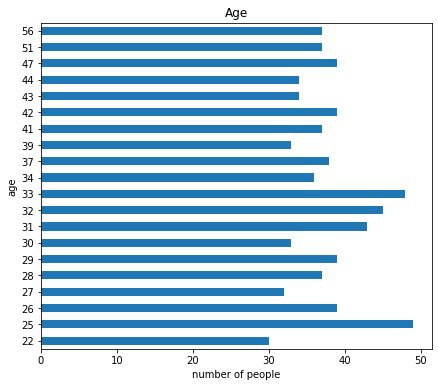

In [29]:
plt.title('Age')
plt.xlabel('number of people')
plt.ylabel('age')
age_df['Age'].value_counts().sort_values(ascending=False)[:20].sort_index().plot(kind='barh', figsize=(7, 6))

In [30]:
df['Age'].value_counts()

25.0    49
33.0    48
32.0    45
31.0    43
47.0    39
        ..
91.0     2
7.0      2
11.0     2
98.0     1
0.0      1
Name: Age, Length: 97, dtype: int64

In [31]:
df['Age'].mean()

43.38709677419355

In [32]:
df['Age'].median()

42.0

In [33]:
df['Age'].std()

18.862766504729752

In [34]:
df['Age'].mode()

0    25.0
dtype: float64

In [35]:
df['Age'].max()

98.0

In [36]:
df['Age'].min()

0.0

In [37]:
df['Age'].sum()

75320.0

# Correlation Matrix
Correlation matrix using sex and age. First have to convert sex to numerical values. 

In [39]:
df["Sex"].value_counts()

Male      1024
Female     894
unknow       2
V            1
Name: Sex, dtype: int64

In [40]:
df["Sex"].replace("Unknow", np.nan)

0         Male
1         Male
2       Female
3         Male
4       Female
         ...  
2990       NaN
2991       NaN
2992       NaN
2993       NaN
2994       NaN
Name: Sex, Length: 2995, dtype: object

In [41]:
df["Sex"].replace("V", np.nan)

0         Male
1         Male
2       Female
3         Male
4       Female
         ...  
2990       NaN
2991       NaN
2992       NaN
2993       NaN
2994       NaN
Name: Sex, Length: 2995, dtype: object

In [42]:
df['new_Sex'] = np.where(df['Sex'] == 'Male', 0, 1)

In [43]:
df['new_Sex'].value_counts()

1    1971
0    1024
Name: new_Sex, dtype: int64

In [44]:
sub_df = df[["Age", "new_Sex"]]

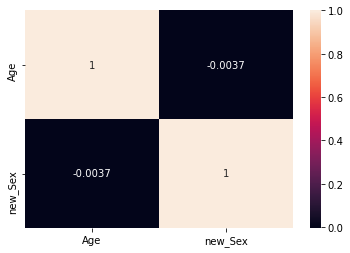

In [45]:
sns.heatmap(sub_df.corr(), annot=True)
plt.show()